In [1]:
#import dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

In [2]:
# OBSERVATIONS
#Look across all previously generated figures and tables and write at least three observations or inferences 
#that can be made from the data. Include these observations at the top of notebook.

# Observation 1: The data analysis shows positive relationship between tumor volume and weights. Indeed, the the 
# coefficient of correlation between the mouse weight and the average tumor volume  (R2) = 0.84

# Observation 2: Pvalue = 1.32 which shows the model do not explain the relationship between the mouse weight and 
# the average tumor volume.

# Observation 3: The plot line shows their is no relationship between the timepoint and the tumor volume. 
# Also the box plot and whisker shows that only one drug regimen (infubinol) has outliers or extreme values.
# Also, the data analysis shows the mouse distribution by sex is almost equal.

In [3]:
os.getcwd()

'C:\\Users\\sakon\\Desktop\\MASTER CSU\\CWRU_BOOTCAMP\\1.Hmw\\Matplotlib-challenge\\matplotlib-challenge'

In [4]:
# Set the path to the file
os.chdir("C:\\Users\\sakon\\Desktop\\MASTER CSU\\CWRU_BOOTCAMP\\1.Hmw\Matplotlib-challenge\\")

In [5]:
file1=os.path.join("C:\\Users\\sakon\\Desktop\\MASTER CSU\\CWRU_BOOTCAMP\\1.Hmw\Matplotlib-challenge","Study_results.csv")

In [6]:
file2=os.path.join("C:\\Users\\sakon\\Desktop\\MASTER CSU\\CWRU_BOOTCAMP\\1.Hmw\Matplotlib-challenge","Mouse_metadata.csv")

In [7]:
print (file1)

C:\Users\sakon\Desktop\MASTER CSU\CWRU_BOOTCAMP\1.Hmw\Matplotlib-challenge\Study_results.csv


In [8]:
Study_results = pd.read_csv("C:\\Users\\sakon\\Desktop\\MASTER CSU\\CWRU_BOOTCAMP\\1.Hmw\Matplotlib-challenge\\Study_results.csv")
Mouse_metadata = pd.read_csv("C:\\Users\\sakon\\Desktop\\MASTER CSU\\CWRU_BOOTCAMP\\1.Hmw\Matplotlib-challenge\\Mouse_metadata.csv")

In [9]:
Study_results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0

In [10]:
Mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [11]:
#Merge Mouse metadata and study results

DataMerge1=pd.merge(Mouse_metadata, Study_results, how='right', on=['Mouse ID'])
DataMerge1

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [12]:
Data=DataMerge1.drop_duplicates()

In [13]:
Data.shape

(1892, 8)

In [14]:
# Group data by drug regimen

Datagroup=Data.groupby("Drug Regimen")
Datagroup

In [15]:
DataStat1=Datagroup["Tumor Volume (mm3)"].sum()
DataStat2=Datagroup["Tumor Volume (mm3)"].mean()
DataStat3=Datagroup["Tumor Volume (mm3)"].median()
DataStat4=Datagroup["Tumor Volume (mm3)"].var()
DataStat5=Datagroup["Tumor Volume (mm3)"].sem()
DataStat6=Datagroup["Tumor Volume (mm3)"].std()

In [16]:
print(DataStat1)

Drug Regimen
Capomulin     9355.420462
Ceftamin      9361.228582
Infubinol     9413.493529
Ketapril     10384.299876
Naftisol     10105.671026
Placebo       9780.078122
Propriva      8378.930878
Ramicane      9169.417875
Stelasyn      9816.199991
Zoniferol     9689.044192
Name: Tumor Volume (mm3), dtype: float64


In [17]:
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each drug regimen

Summary_table=pd.DataFrame({"Total tumor volume":DataStat1, 
                            "Tumor Mean":DataStat2, 
                            "Tumor Median":DataStat3, 
                            "Tumor Variance":DataStat4,
                            "Tumor standard deviation":DataStat6,
                            "Tumor Standard Error of the Mean": DataStat5})
round(Summary_table, 2)

Total tumor volume  Tumor Mean  Tumor Median  Tumor Variance  \
Drug Regimen                                                                 
Capomulin                9355.42       40.68         41.56           24.95   
Ceftamin                 9361.23       52.59         51.78           39.29   
Infubinol                9413.49       52.88         51.82           43.13   
Ketapril                10384.30       55.24         53.70           68.55   
Naftisol                10105.67       54.33         52.51           66.17   
Placebo                  9780.08       54.03         52.29           61.17   
Propriva                 8378.93       52.37         50.91           42.28   
Ramicane                 9169.42       40.22         40.67           23.49   
Stelasyn                 9816.20       54.23         52.43           59.45   
Zoniferol                9689.04       53.24         51.82           48.53   

              Tumor standard deviation  Tumor Standard Error of the Mean  
Drug Regimen                                                              
Capomulin                         4.99                              0.33  
Ceftamin                          6.27                              0.47  
Infubinol                         6.57                              0.49  
Ketapril                          8.28                              0.60  
Naftisol                          8.13                              0.60  
Placebo                           7.82                              0.58  
Propriva                          6.50                              0.51  
Ramicane                          4.85                              0.32  
Stelasyn                          7.71                              0.57  
Zoniferol                         6.97                              0.52

In [18]:
DataStat7=Datagroup["Tumor Volume (mm3)"].count()
DataStat7

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     160
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

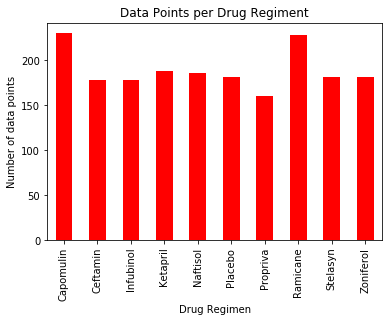

In [19]:
Myplot=DataStat7.plot.bar(color='Red')
Myplot
plt.ylabel("Number of data points")
plt.title("Data Points per Drug Regiment")
plt.savefig('barplot1')

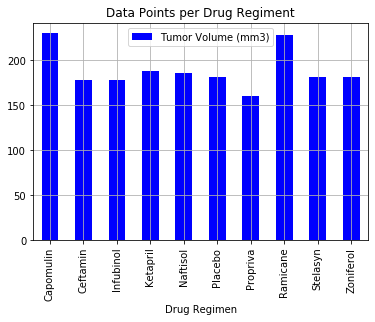

In [20]:
DataStat7.plot.bar(color='Blue', title='Data Points per Drug Regiment', legend=True, grid=True,)

In [21]:
Data_pie=Mouse_metadata.groupby('Sex').count()
Data_pie

Mouse ID  Drug Regimen  Age_months  Weight (g)
Sex                                                   
Female       124           124         124         124
Male         125           125         125         125

In [22]:
labels=[Mouse_metadata['Sex'].unique()]
L1=list(Data_pie.index)

In [23]:
Sizes=[Data_pie['Mouse ID']]
Sizes

[Sex
 Female    124
 Male      125
 Name: Mouse ID, dtype: int64]

In [24]:
Colors=['orange','blue']
plt.pie(Sizes, labels=L1, colors=Colors, autopct='%1.1f%%', shadow=True, startangle=180)
plt.title('Distribution by sex in the mouse population')
plt.ylabel('Sex')
plt.show

C:\Users\sakon\anaconda3.1\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<function matplotlib.pyplot.show(*args, **kw)>

In [25]:
Matplot_pie=Data_pie['Mouse ID'].plot(kind='pie', y='Sizes', figsize=(6,6), autopct='%1.1f%%', shadow=True, startangle=180)
plt.title('Distribution by sex in the mouse population')
plt.ylabel('Sex')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [26]:
DataPro=Data[Data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol',
                                        'Ceftamin'])].sort_values(['Timepoint'],ascending=True)
DataPro

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane    Male          21          16          0   
1391     q132    Infubinol  Female           1          30          0   
195      i738    Capomulin  Female          23          20          0   
205      a520     Ramicane    Male          13          21          0   
1370     p438     Ceftamin  Female          11          26          0   
...       ...          ...     ...         ...         ...        ...   
350      v923    Capomulin  Female          19          21         45   
144      m957    Capomulin  Female           3          19         45   
337      j119    Capomulin  Female           7          23         45   
59       s508     Ramicane    Male           1          17         45   
1872     z581    Infubinol  Female          24          25         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1391           45.000000                 0  
195            45.000000                 0  
205            45.000000                 0  
1370           45.000000                 0  
...                  ...               ...  
350            40.658124                 2  
144            33.329098                 1  
337            38.125164                 1  
59             30.276232                 0  
1872           62.754451                 3  

[814 rows x 8 columns]

In [27]:
MouseWei=DataPro.loc[DataPro['Drug Regimen']=="Capomulin",:]
MouseWei

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
195      i738    Capomulin  Female          23          20          0   
215      w914    Capomulin    Male          24          21          0   
235      g288    Capomulin    Male           3          19          0   
273      l897    Capomulin    Male          17          19          0   
1452     r157    Capomulin    Male          22          25          0   
...       ...          ...     ...         ...         ...        ...   
124      y793    Capomulin    Male          17          17         45   
134      r554    Capomulin  Female           8          17         45   
350      v923    Capomulin  Female          19          21         45   
144      m957    Capomulin  Female           3          19         45   
337      j119    Capomulin  Female           7          23         45   

      Tumor Volume (mm3)  Metastatic Sites  
195            45.000000                 0  
215            45.000000                 0  
235            45.000000                 0  
273            45.000000                 0  
1452           45.000000                 0  
...                  ...               ...  
124            31.896238                 2  
134            32.377357                 3  
350            40.658124                 2  
144            33.329098                 1  
337            38.125164                 1  

[230 rows x 8 columns]

In [28]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment 
# regimens.
MouseWeigrpe=MouseWei.groupby("Mouse ID").max()["Timepoint"]
MouseWeigrpe_df=pd.DataFrame(MouseWeigrpe)
MouseWeigrpe_df

Timepoint
Mouse ID           
b128             45
b742             45
f966             20
g288             45
g316             45
i557             45
i738             45
j119             45
j246             35
l509             45
l897             45
m601             45
m957             45
r157             15
r554             45
r944             45
s185             45
s710             45
t565             45
u364             45
v923             45
w150             10
w914             45
x401             45
y793             45

In [29]:
MouseScatter=pd.merge(MouseWeigrpe_df, MouseWei, on=('Mouse ID', 'Timepoint'))
MouseScatter

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      b128         45    Capomulin  Female           9          22   
1      b742         45    Capomulin    Male           7          21   
2      f966         20    Capomulin    Male          16          17   
3      g288         45    Capomulin    Male           3          19   
4      g316         45    Capomulin  Female          22          22   
5      i557         45    Capomulin  Female           1          24   
6      i738         45    Capomulin  Female          23          20   
7      j119         45    Capomulin  Female           7          23   
8      j246         35    Capomulin  Female          21          21   
9      l509         45    Capomulin    Male          17          21   
10     l897         45    Capomulin    Male          17          19   
11     m601         45    Capomulin    Male          22          17   
12     m957         45    Capomulin  Female           3          19   
13     r157         15    Capomulin    Male          22          25   
14     r554         45    Capomulin  Female           8          17   
15     r944         45    Capomulin    Male          12          25   
16     s185         45    Capomulin  Female           3          17   
17     s710         45    Capomulin  Female           1          23   
18     t565         45    Capomulin  Female          20          17   
19     u364         45    Capomulin    Male          18          17   
20     v923         45    Capomulin  Female          19          21   
21     w150         10    Capomulin    Male          23          23   
22     w914         45    Capomulin    Male          24          21   
23     x401         45    Capomulin  Female          16          15   
24     y793         45    Capomulin    Male          17          17   

    Tumor Volume (mm3)  Metastatic Sites  
0            38.982878                 2  
1            38.939633                 0  
2            30.485985                 0  
3            37.074024                 1  
4            40.159220                 2  
5            47.685963                 1  
6            37.311846                 2  
7            38.125164                 1  
8            38.753265                 1  
9            41.483008                 3  
10           38.846876                 1  
11           28.430964                 1  
12           33.329098                 1  
13           46.539206                 0  
14           32.377357                 3  
15           41.581521                 2  
16           23.343598                 1  
17           40.728578                 1  
18           34.455298                 0  
19           31.023923                 3  
20           40.658124                 2  
21           39.952347                 0  
22           36.041047                 2  
23           28.484033                 0  
24           31.896238                 2

In [30]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all 
# four treatment regimens.
StatQuart= MouseScatter['Tumor Volume (mm3)']
Quartiles= StatQuart.quantile([0.25, 0.50, 0.75])
LowerQ=Quartiles[0.25]
UpperQ=Quartiles[0.75]
IQR1=UpperQ-LowerQ
Lowerbound=LowerQ-(1.5*IQR1)
Upperbound=UpperQ+(1.5*IQR1)
print(f"Capomulin outliers values below{Lowerbound} and above {Upperbound}")

Capomulin outliers values below20.70456164999999 and above 51.83201549


In [31]:
MouseWeiR=DataPro.loc[DataPro['Drug Regimen']=="Ramicane",:]
MouseWeiR

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16          0   
205     a520     Ramicane    Male          13          21          0   
225     r811     Ramicane    Male           9          19          0   
245     i334     Ramicane  Female           8          20          0   
255     q610     Ramicane  Female          18          21          0   
..       ...          ...     ...         ...         ...        ...   
74      m546     Ramicane    Male          18          16         45   
84      z578     Ramicane    Male          11          16         45   
94      j913     Ramicane  Female           4          17         45   
114     n364     Ramicane    Male           4          17         45   
59      s508     Ramicane    Male           1          17         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             45.000000                 0  
205           45.000000                 0  
225           45.000000                 0  
245           45.000000                 0  
255           45.000000                 0  
..                  ...               ...  
74            30.564625                 1  
84            30.638696                 0  
94            31.560470                 1  
114           31.095335                 1  
59            30.276232                 0  

[228 rows x 8 columns]

In [32]:
MouseWeigrpeR=MouseWeiR.groupby("Mouse ID").max()["Timepoint"]
MouseWeigrpe_dfR=pd.DataFrame(MouseWeigrpeR)
MouseWeigrpe_dfR

Timepoint
Mouse ID           
a411             45
a444             45
a520             45
a644             45
c458             30
c758             45
d251             45
e662             45
g791             45
i177             45
i334             45
j913             45
j989             45
k403             45
m546             45
n364             45
q597             45
q610             35
r811             45
r921             30
s508             45
u196             45
w678              5
y449             15
z578             45

In [33]:
MouseScatterR=pd.merge(MouseWeigrpe_dfR, MouseWeiR, on=('Mouse ID', 'Timepoint'))
MouseScatterR

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a411         45     Ramicane    Male           3          22   
1      a444         45     Ramicane  Female          10          25   
2      a520         45     Ramicane    Male          13          21   
3      a644         45     Ramicane  Female           7          17   
4      c458         30     Ramicane  Female          23          20   
5      c758         45     Ramicane    Male           9          17   
6      d251         45     Ramicane  Female           8          19   
7      e662         45     Ramicane    Male           8          24   
8      g791         45     Ramicane    Male          11          16   
9      i177         45     Ramicane    Male          10          18   
10     i334         45     Ramicane  Female           8          20   
11     j913         45     Ramicane  Female           4          17   
12     j989         45     Ramicane    Male           8          19   
13     k403         45     Ramicane    Male          21          16   
14     m546         45     Ramicane    Male          18          16   
15     n364         45     Ramicane    Male           4          17   
16     q597         45     Ramicane    Male          20          25   
17     q610         35     Ramicane  Female          18          21   
18     r811         45     Ramicane    Male           9          19   
19     r921         30     Ramicane  Female           5          25   
20     s508         45     Ramicane    Male           1          17   
21     u196         45     Ramicane    Male          18          25   
22     w678          5     Ramicane  Female           5          24   
23     y449         15     Ramicane    Male          19          24   
24     z578         45     Ramicane    Male          11          16   

    Tumor Volume (mm3)  Metastatic Sites  
0            38.407618                 1  
1            43.047543                 0  
2            38.810366                 1  
3            32.978522                 1  
4            38.342008                 2  
5            33.397653                 1  
6            37.311236                 2  
7            40.659006                 2  
8            29.128472                 1  
9            33.562402                 3  
10           36.374510                 2  
11           31.560470                 1  
12           36.134852                 1  
13           22.050126                 1  
14           30.564625                 1  
15           31.095335                 1  
16           45.220869                 2  
17           36.561652                 2  
18           37.225650                 1  
19           43.419381                 1  
20           30.276232                 0  
21           40.667713                 3  
22           43.166373                 0  
23           44.183451                 0  
24           30.638696                 0

In [34]:
StatQuartR= MouseScatterR['Tumor Volume (mm3)']
QuartilesR= StatQuartR.quantile([0.25, 0.50, 0.75])
LowerQR=QuartilesR[0.25]
UpperQR=QuartilesR[0.75]
IQR1R=UpperQR-LowerQR
Lowerbound=LowerQR-(1.5*IQR1R)
Upperbound=UpperQR+(1.5*IQR1R)
print(f"Ramicane outliers values below {Lowerbound} and above {Upperbound}")

Ramicane outliers values below 17.912664470000003 and above 54.30681135


In [35]:
MouseWeiI=DataPro.loc[DataPro['Drug Regimen']=="Infubinol",:]
MouseWeiI 

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1391     q132    Infubinol  Female           1          30          0   
1313     o813    Infubinol    Male          24          28          0   
1305     o809    Infubinol    Male           3          25          0   
1219     n671    Infubinol    Male          18          25          0   
1204     m756    Infubinol    Male          19          30          0   
...       ...          ...     ...         ...         ...        ...   
473      a251    Infubinol  Female          21          25         45   
1053     k483    Infubinol  Female          20          30         45   
800      e476    Infubinol    Male          23          26         45   
834      f345    Infubinol    Male          23          26         45   
1872     z581    Infubinol  Female          24          25         45   

      Tumor Volume (mm3)  Metastatic Sites  
1391           45.000000                 0  
1313           45.000000                 0  
1305           45.000000                 0  
1219           45.000000                 0  
1204           45.000000                 0  
...                  ...               ...  
473            65.525743                 1  
1053           66.196912                 3  
800            62.435404                 1  
834            60.918767                 1  
1872           62.754451                 3  

[178 rows x 8 columns]

In [36]:
MouseWeigrpeI=MouseWeiI.groupby("Mouse ID").max()["Timepoint"]
MouseWeigrpe_dfI=pd.DataFrame(MouseWeigrpeI)
MouseWeigrpe_dfI

Timepoint
Mouse ID           
a203             45
a251             45
a577             30
a685             45
c139             45
c326              5
c895             30
e476             45
f345             45
i386             40
k483             45
k804             35
m756              5
n671             30
o809             35
o813              5
q132             30
s121             25
v339              5
v719             20
v766             15
w193             20
w584             30
y163             45
z581             45

In [37]:
MouseScatterI=pd.merge(MouseWeigrpe_dfI, MouseWeiI, on=('Mouse ID', 'Timepoint'))
MouseScatterI

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a577         30    Infubinol  Female           6          25   
3      a685         45    Infubinol    Male           8          30   
4      c139         45    Infubinol    Male          11          28   
5      c326          5    Infubinol  Female          18          25   
6      c895         30    Infubinol  Female           7          29   
7      e476         45    Infubinol    Male          23          26   
8      f345         45    Infubinol    Male          23          26   
9      i386         40    Infubinol  Female          23          29   
10     k483         45    Infubinol  Female          20          30   
11     k804         35    Infubinol  Female          23          29   
12     m756          5    Infubinol    Male          19          30   
13     n671         30    Infubinol    Male          18          25   
14     o809         35    Infubinol    Male           3          25   
15     o813          5    Infubinol    Male          24          28   
16     q132         30    Infubinol  Female           1          30   
17     s121         25    Infubinol    Male          23          26   
18     v339          5    Infubinol    Male          20          26   
19     v719         20    Infubinol  Female          17          30   
20     v766         15    Infubinol    Male          16          27   
21     w193         20    Infubinol    Male          22          30   
22     w584         30    Infubinol    Male           3          29   
23     y163         45    Infubinol  Female          17          27   
24     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743                 1  
2            57.031862                 2  
3            66.083066                 3  
4            72.226731                 2  
5            36.321346                 0  
6            60.969711                 2  
7            62.435404                 1  
8            60.918767                 1  
9            67.289621                 4  
10           66.196912                 3  
11           62.117279                 2  
12           47.010364                 1  
13           60.165180                 0  
14           55.629428                 1  
15           45.699331                 0  
16           54.656549                 4  
17           55.650681                 2  
18           46.250112                 0  
19           54.048608                 1  
20           51.542431                 1  
21           50.005138                 0  
22           58.268442                 1  
23           67.685569                 3  
24           62.754451                 3

In [38]:
StatQuartI= MouseScatterI['Tumor Volume (mm3)']
Quartiles= StatQuartI.quantile([0.25, 0.50, 0.75])
LowerQ=Quartiles[0.25]
UpperQ=Quartiles[0.75]
IQR1=UpperQ-LowerQ
Lowerbound=LowerQ-(1.5*IQR1)
Upperbound=UpperQ+(1.5*IQR1)
print(f"Infubinol outliers values below{Lowerbound} and above {Upperbound}")

Infubinol outliers values below36.83290494999999 and above 82.74144559000001


In [39]:
MouseWeiC=DataPro.loc[DataPro['Drug Regimen']=="Ceftamin",:]
MouseWeiC 

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1370     p438     Ceftamin  Female          11          26          0   
1251     o287     Ceftamin    Male           2          28          0   
1153     l733     Ceftamin  Female           4          30          0   
1123     l661     Ceftamin    Male          18          26          0   
1398     q483     Ceftamin    Male           6          26          0   
...       ...          ...     ...         ...         ...        ...   
1132     l661     Ceftamin    Male          18          26         45   
1162     l733     Ceftamin  Female           4          30         45   
1033     k210     Ceftamin    Male          15          28         45   
1670     w151     Ceftamin    Male          24          25         45   
993      j296     Ceftamin  Female          24          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
1370           45.000000                 0  
1251           45.000000                 0  
1153           45.000000                 0  
1123           45.000000                 0  
1398           45.000000                 0  
...                  ...               ...  
1132           59.851956                 3  
1162           64.299830                 1  
1033           68.923185                 3  
1670           67.527482                 3  
993            61.849023                 3  

[178 rows x 8 columns]

In [40]:
MouseWeigrpeC=MouseWeiC.groupby("Mouse ID").max()["Timepoint"]
MouseWeigrpe_dfC=pd.DataFrame(MouseWeigrpeC)
MouseWeigrpe_dfC

Timepoint
Mouse ID           
a275             45
b447              0
b487             25
b759             30
f436             15
h531              5
j296             45
k210             45
l471             45
l490             30
l558             10
l661             45
l733             45
o287             45
p438             45
q483             40
t573              0
u149             25
u153              0
w151             45
x226              0
x581             45
x822             45
y769             45
y865             45

In [41]:
MouseScatterC=pd.merge(MouseWeigrpe_dfC, MouseWeiC, on=('Mouse ID', 'Timepoint'))
MouseScatterC

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a275         45     Ceftamin  Female          20          28   
1      b447          0     Ceftamin    Male           2          30   
2      b487         25     Ceftamin  Female           6          28   
3      b759         30     Ceftamin  Female          12          25   
4      f436         15     Ceftamin  Female           3          25   
5      h531          5     Ceftamin    Male           5          27   
6      j296         45     Ceftamin  Female          24          30   
7      k210         45     Ceftamin    Male          15          28   
8      l471         45     Ceftamin  Female           7          28   
9      l490         30     Ceftamin    Male          24          26   
10     l558         10     Ceftamin  Female          13          30   
11     l661         45     Ceftamin    Male          18          26   
12     l733         45     Ceftamin  Female           4          30   
13     o287         45     Ceftamin    Male           2          28   
14     p438         45     Ceftamin  Female          11          26   
15     q483         40     Ceftamin    Male           6          26   
16     t573          0     Ceftamin  Female          15          27   
17     u149         25     Ceftamin    Male          24          29   
18     u153          0     Ceftamin  Female          11          25   
19     w151         45     Ceftamin    Male          24          25   
20     x226          0     Ceftamin    Male          23          28   
21     x581         45     Ceftamin  Female          19          28   
22     x822         45     Ceftamin    Male           3          29   
23     y769         45     Ceftamin  Female           6          27   
24     y865         45     Ceftamin    Male          23          26   

    Tumor Volume (mm3)  Metastatic Sites  
0            62.999356                 3  
1            45.000000                 0  
2            56.057749                 1  
3            55.742829                 1  
4            48.722078                 2  
5            47.784682                 0  
6            61.849023                 3  
7            68.923185                 3  
8            67.748662                 1  
9            57.918381                 3  
10           46.784535                 0  
11           59.851956                 3  
12           64.299830                 1  
13           59.741901                 4  
14           61.433892                 1  
15           64.192341                 1  
16           45.000000                 0  
17           52.925348                 0  
18           45.000000                 0  
19           67.527482                 3  
20           45.000000                 0  
21           64.634949                 3  
22           61.386660                 3  
23           68.594745                 4  
24           64.729837                 3

In [42]:
StatQuartC= MouseScatterC['Tumor Volume (mm3)']
Quartiles= StatQuartC.quantile([0.25, 0.50, 0.75])
LowerQ=Quartiles[0.25]
UpperQ=Quartiles[0.75]
IQR1=UpperQ-LowerQ
Lowerbound=LowerQ-(1.5*IQR1)
Upperbound=UpperQ+(1.5*IQR1)
print(f"Ceftamin outliers values below {Lowerbound} and above {Upperbound}")

Ceftamin outliers values below 25.355449580000002 and above 87.66645829999999


In [43]:
DataPro1=DataPro[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
DataPro1

Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0        k403     Ramicane          0           45.000000
1391     q132    Infubinol          0           45.000000
195      i738    Capomulin          0           45.000000
205      a520     Ramicane          0           45.000000
1370     p438     Ceftamin          0           45.000000
...       ...          ...        ...                 ...
350      v923    Capomulin         45           40.658124
144      m957    Capomulin         45           33.329098
337      j119    Capomulin         45           38.125164
59       s508     Ramicane         45           30.276232
1872     z581    Infubinol         45           62.754451

[814 rows x 4 columns]

In [44]:
Data1_sort=DataPro1.groupby(["Drug Regimen", "Mouse ID"]).last()['Tumor Volume (mm3)']
Data1_sort

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
                            ...    
Ramicane      s508        30.276232
              u196        40.667713
              w678        43.166373
              y449        44.183451
              z578        30.638696
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [45]:
Data1_sort_df=Data1_sort.to_frame()
Data1_sort_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

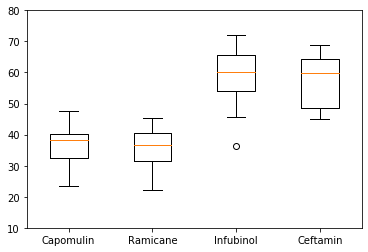

In [46]:
# generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight 
# any potential outliers 
name=['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
DataF=Data1_sort_df.reset_index()
Data_list=Data1_sort_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
Data_list_df=pd.DataFrame(Data_list)
Data_list_df=Data_list_df.reindex(name)
DataFinal=[x for x in Data_list_df['Tumor Volume (mm3)']]
plt.boxplot(DataFinal, labels=name)
plt.ylim(10,80)
plt.show()

In [47]:
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin. 

M957=DataPro1.loc[DataPro1['Mouse ID']=="m957",:]
M957

Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
135     m957    Capomulin          0           45.000000
136     m957    Capomulin          5           45.622381
137     m957    Capomulin         10           46.414518
138     m957    Capomulin         15           39.804453
139     m957    Capomulin         20           38.909349
140     m957    Capomulin         25           37.695432
141     m957    Capomulin         30           38.212479
142     m957    Capomulin         35           32.562839
143     m957    Capomulin         40           32.947615
144     m957    Capomulin         45           33.329098

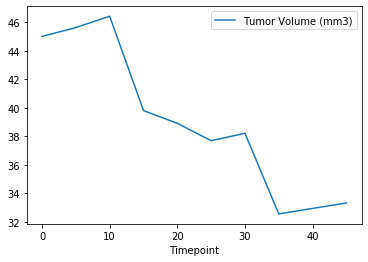

In [48]:
#Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin.

M957.plot.line(x='Timepoint',y='Tumor Volume (mm3)')

In [49]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.

MouseWei=DataPro.loc[DataPro['Drug Regimen']=="Capomulin",:]
MouseWei

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
195      i738    Capomulin  Female          23          20          0   
215      w914    Capomulin    Male          24          21          0   
235      g288    Capomulin    Male           3          19          0   
273      l897    Capomulin    Male          17          19          0   
1452     r157    Capomulin    Male          22          25          0   
...       ...          ...     ...         ...         ...        ...   
124      y793    Capomulin    Male          17          17         45   
134      r554    Capomulin  Female           8          17         45   
350      v923    Capomulin  Female          19          21         45   
144      m957    Capomulin  Female           3          19         45   
337      j119    Capomulin  Female           7          23         45   

      Tumor Volume (mm3)  Metastatic Sites  
195            45.000000                 0  
215            45.000000                 0  
235            45.000000                 0  
273            45.000000                 0  
1452           45.000000                 0  
...                  ...               ...  
124            31.896238                 2  
134            32.377357                 3  
350            40.658124                 2  
144            33.329098                 1  
337            38.125164                 1  

[230 rows x 8 columns]

Text(0, 0.5, 'Tumor Volume (mm3)')

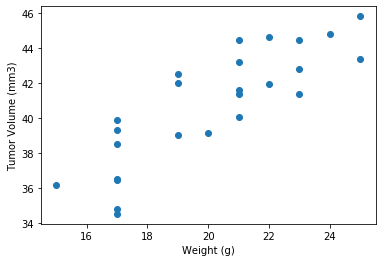

In [50]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
DataScart=MouseWei.groupby(["Mouse ID"]).mean()
plt.scatter(DataScart['Weight (g)'], DataScart['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

In [51]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the 
# Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
import scipy.stats as st
Cor=st.pearsonr(DataScart['Weight (g)'], DataScart['Tumor Volume (mm3)'])[0]
print(f"the coefficient of correlation between the mouse weight and the average tumor volume is {Cor}")

the coefficient of correlation between the mouse weight and the average tumor volume is 0.8419363424694717


In [52]:
LinReg=st.linregress((DataScart['Weight (g)'], DataScart['Tumor Volume (mm3)']))
LinReg

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

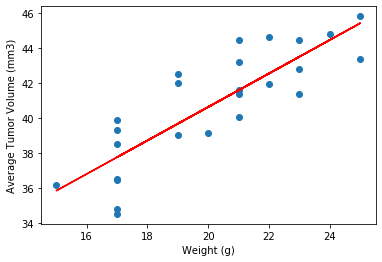

In [54]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous 
# scatter plot.
a=0.9544396890241045
b=21.552160532685015
y=DataScart['Weight (g)']*a+b
plt.scatter(DataScart['Weight (g)'], DataScart['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.plot(DataScart['Weight (g)'], y, color='red')
plt.show()